# Decision tree and Ensemble Learning

## 6.1 Credit risk scoring project

Dataset

https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 6.2 Data Cleaning and Preparation

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [5]:
status_values = {
    1:'ok',
    2:'default',
    0:'unk'
}
df.status = df.status.map(status_values)

In [6]:
df.job.value_counts()

1    2806
3    1024
2     452
4     171
0       2
Name: job, dtype: int64

In [7]:
home_values = {
    1: "rent",
    2: "owner",
    3: "priv",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk"
}

df.home = df.home.map(home_values)

marital_values = {
    1:"single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk"
}

df.marital = df.marital.map(marital_values)

records_values = {
    1:"no_rec",
    2: "yes_rec"
}

df.records = df.records.map(records_values)

job_values = {
    1: "fixed",
    2: "partime",
    3: "freelance",
    4: "others",
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for c in ['income','assets','debt']:

    df[c] = df[c].replace(99999999, np.nan)

In [11]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [12]:
df = df[~(df['status'] == 'unk')].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=11)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.3 Decision tree

In [17]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [18]:
xi = df_train.loc[0].to_dict()

In [19]:
assess_risk(xi)

'ok'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
y_pred = dt.predict_proba(X_val)[:,1]

In [26]:
roc_auc_score(y_val,y_pred)

0.645951902351602

In [27]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

#Re train

In [28]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [29]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)

print('Train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc=roc_auc_score(y_val,y_pred)

print('Val:', auc)


Train: 0.7054989859726213
Val: 0.6685264343319367


In [30]:
from sklearn.tree import export_text

In [31]:
print(export_text(dt, feature_names= dv.get_feature_names()))

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



## 6.4 Decision tree learning algorithm

In [32]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example= pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [33]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [34]:
Ts = [2000,3000,4000,5000,8000]

In [35]:
from IPython.display import display

In [36]:
for T in Ts:
    print(T)
    df_left =  df_example[df_example.assets <= T]
    df_right =  df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [37]:
# 3 features

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000,2000, 'default'],
]
df_example= pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [38]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [40]:
thresholds = {
    'assets': [0,2000,3000,4000,5000,8000],
    'debt' : [500,1000,2000]
}

In [43]:
for feature, Ts in thresholds.items():
    print('###############################')
    print(feature)
    for T in Ts:
        print(T)
        df_left =  df_example[df_example[feature] <= T]
        df_right =  df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        
        print()
    print('###############################')

###############################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

###############################
###############################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

###############################


### Finding the best split algorithm:

- For F in features:
    
    Find all thresholds for F
    
    - for T in thresholds:
        
        Split dataset usinf "F>T" condition
        
        Compute the impurity of this split

- Select the condition with the LOWEST impurity

### Stop criteria

- Group alredy pure
- Tree reached depth limit
- Group too small to split

### Decision tree learning algorithm

- Find the best split
- Stop if max_depth is reached, if not:
- If left is successfully large and not pure:
    - Repeat for left
- If right is successfully large and not pure:
    - Repeat for right

## 6.5 Decision trees parameter tuning

In [45]:
for d in [1,2,3,4,5,6,10,15,20,None]:

    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)

    print('%4s -> %.3f' % (d,auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.757
  10 -> 0.707
  15 -> 0.681
  20 -> 0.662
None -> 0.650


In [60]:
scores = []
for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf= s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)

        scores.append((d,s,auc))

In [61]:
df_scores = pd.DataFrame(scores, columns = ['max_depth','min_samples_leaf','auc'])
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [62]:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10.0,15,0.790033
58,20.0,15,0.787099
49,15.0,15,0.786845
67,NaN,15,0.786539
22,6.0,15,0.785319


In [63]:
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns=['max_depth'], values= ['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.650  0.761  0.766  0.749  0.750  0.696  0.658  0.651
2                 0.690  0.761  0.767  0.754  0.759  0.717  0.694  0.697
5                 0.710  0.761  0.768  0.760  0.759  0.730  0.719  0.718
10                0.761  0.761  0.762  0.778  0.763  0.766  0.759  0.764
15                0.787  0.764  0.772  0.785  0.780  0.790  0.787  0.787
20                0.781  0.761  0.774  0.774  0.780  0.784  0.784  0.785
100               0.780  0.756  0.763  0.776  0.780  0.780  0.779  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

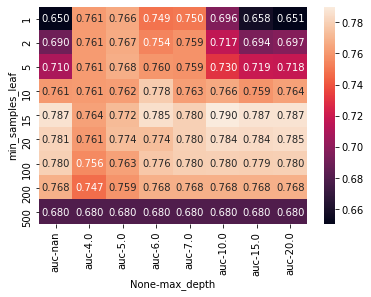

In [64]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [65]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [68]:
y_pred = rf.predict_proba(X_val)[:,1]

In [69]:
roc_auc_score(y_val,y_pred)

0.7921490155239641

In [70]:
scores = []
for n in range(10,201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    scores.append((n,auc))
    

In [73]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


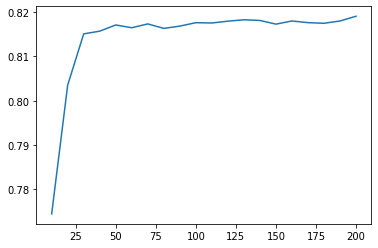

In [74]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [75]:
scores = []


for d in [5,10,15]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((d,n,auc))

In [76]:
df_scores = pd.DataFrame(scores, columns = ['max_depth','n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


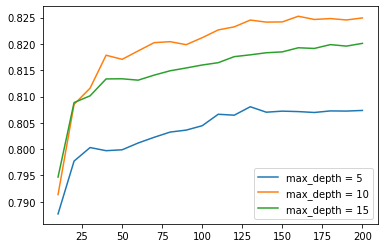

In [78]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth = %d' % d)

plt.legend()

In [79]:
max_depth = 10

In [80]:
scores = []


for s in [1,3,5,10,50]:
    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((s,n,auc))

In [82]:
df_scores = pd.DataFrame(scores, columns = ['min_samples_leaf','n_estimators', 'auc'])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


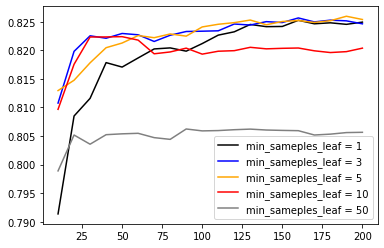

In [83]:
colors = ['black','blue','orange','red','grey']
min_samples_leaf_values = [1,3,5,10,50]
for s, col in zip(min_samples_leaf_values,colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color= col, label = 'min_sameples_leaf = %s' % s)

plt.legend()

In [84]:
min_samples_leaf = 3

In [85]:
rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)